# InferSent Training NLI

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!ls

drive  sample_data


In [3]:
%cd drive/My\ Drive/MasterProject/MyCode/InferSent/

/content/drive/My Drive/MasterProject/MyCode/InferSent


In [4]:
!ls fastText

ls: cannot access 'fastText': No such file or directory


In [5]:
# import stuff
%load_ext autoreload
%autoreload 2
%matplotlib inline

from random import randint

import numpy as np
import torch

# Load encoder Glove

In [6]:
!ls

 CODE_OF_CONDUCT.md	      LICENSE	    README.md
 CONTRIBUTING.md	      models.py     samples.txt
 data.py		      mutils.py    'Train NLI.ipynb'
 demoInferSentEcndoer.ipynb   output	    TrainNLIOnColab.ipynb
 extract_features.py	      __pycache__   train_nli.py


In [7]:
# Load model
from models import InferSent
model_version = 1
MODEL_PATH = "../encoder/infersent%s.pkl" % model_version
params_model = {'bsize': 64, 'word_emb_dim': 300, 'enc_lstm_dim': 2048,
                'pool_type': 'max', 'dpout_model': 0.0, 'version': model_version}
infersent = InferSent(params_model)
infersent.load_state_dict(torch.load(MODEL_PATH))

<All keys matched successfully>

In [8]:
# Keep it on CPU or put it on GPU
use_cuda = True
infersent = infersent.cuda() if use_cuda else infersent

In [9]:
# If infersent1 -> use GloVe embeddings. If infersent2 -> use InferSent embeddings.
W2V_PATH = '../GloVe/glove.840B.300d.txt' if model_version == 1 else '../fastText/crawl-300d-2M.vec'
infersent.set_w2v_path(W2V_PATH)

In [10]:
# Load embeddings of K most frequent words
infersent.build_vocab_k_words(K=100000)

Vocab size : 100000


# Load some sentences

In [11]:
# Load some sentences
sentences = []
with open('samples.txt') as f:
    for line in f:
        sentences.append(line.strip())
print(len(sentences))

9815


In [12]:
sentences[:5]

['Everyone really likes the newest benefits',
 'The Government Executive articles housed on the website are not able to be searched .',
 'I like him for the most part , but would still enjoy seeing someone beat him .',
 'My favorite restaurants are always at least a hundred miles away from my house .',
 'I know exactly .']

In [13]:
embeddings = infersent.encode(sentences, bsize=128, tokenize=False, verbose=True)
print('nb sentences encoded : {0}'.format(len(embeddings)))

Nb words kept : 128201/130068 (98.6%)
Speed : 4659.9 sentences/s (gpu mode, bsize=128)
nb sentences encoded : 9815


# Visualization

In [14]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
np.linalg.norm(infersent.encode(['the cat eats.']))

3.53491

In [16]:
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

In [17]:
cosine(infersent.encode(['the cat eats.'])[0], infersent.encode(['the cat drinks.'])[0])

0.81652397

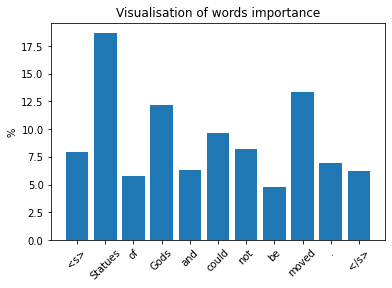

In [18]:
idx = randint(0, len(sentences))
_, _ = infersent.visualize(sentences[idx])

Vocab size : 500000


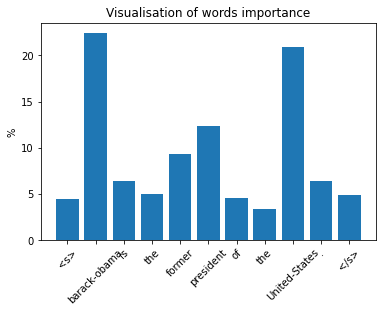

In [19]:
infersent.build_vocab_k_words(500000) # getting 500K words vocab
my_sent = 'barack-obama is the former president of the United-States.'
_, _ = infersent.visualize(my_sent)

# Try Train

In [20]:
#!python train_nli.py --vector_rep '../fastText/crawl-300d-2M.vec' --encoder_path "../encoder/infersent2.pkl" --vocab_samples 10000 --model_version 2 --encoder_type 'InferSent' --use_cuda True --n_epochs 10 --outputmodelname "InferSent_snli_pretrained_FastText"

In [ ]:
!python train_nli.py --encoder_path "../encoder/infersent1.pkl" --vocab_samples 38957 --model_version 1 --encoder_type 'InferSent' --use_cuda True --n_epochs 50 --outputmodelname "InferSent_snli_pretrained_GLOVE" --optimizer adam,lr=0.001

Cuda in use
cuda

togrep : ['--encoder_path', '../encoder/infersent1.pkl', '--vocab_samples', '50000', '--model_version', '1', '--encoder_type', 'InferSent', '--use_cuda', 'True', '--n_epochs', '50', '--outputmodelname', 'InferSent_snli_pretrained_GLOVE500k', '--optimizer', 'adam,lr=0.001']

Namespace(batch_size=64, dataset_path='../datasets/SNLI/', decay=0.99, dpout_fc=0.0, dpout_model=0.0, enc_lstm_dim=2048, encoder_path='../encoder/infersent1.pkl', encoder_type='InferSent', fc_dim=512, lrshrink=5, max_norm=5.0, minlr=1e-05, model_version=1, n_classes=3, n_enc_layers=1, n_epochs=50, nonlinear_fc=0, optimizer='adam,lr=0.001', outputdir='output/', outputmodelname='InferSent_snli_pretrained_GLOVE500k', pool_type='max', seed=1234, use_cuda=True, vector_rep='../GloVe/glove.840B.300d.txt', vocab_samples='50000')
Creation of the directory output//InferSent_snli_pretrained_GLOVE500k failed
** TRAIN DATA : Found 549367 pairs of train sentences.
** DEV DATA : Found 9842 pairs of dev sentences.

In [22]:
from models import InferSent, NLINet

In [23]:
!ls output/InferSent_snli_pretrained_GLOVE

ls: cannot access 'output/InferSent_snli_pretrained_GLOVE': No such file or directory


In [ ]:
nli_net = torch.load('output/InferSent_snli_pretrained_GLOVE/InferSent_snli_pretrained_GLOVE.fullmodel')

In [ ]:
nli_net.encoder.encode("the cat")

array([[ 0.0498216 , -0.07523444,  0.01158171, ..., -0.02952243,
        -0.03549721, -0.00094809],
       [ 0.0492882 , -0.07527903, -0.01934168, ...,  0.0035516 ,
        -0.03549721,  0.07756007],
       [-0.00624913, -0.08255814, -0.01934168, ..., -0.02952243,
        -0.03549721, -0.01923019],
       ...,
       [ 0.03408226, -0.01293736, -0.01934168, ..., -0.02952243,
        -0.03146687,  0.05106585],
       [ 0.00828032, -0.01520202, -0.00848539, ..., -0.01497639,
        -0.03549721, -0.01923019],
       [ 0.0498216 , -0.07523444,  0.01158171, ..., -0.02952243,
        -0.03549721, -0.00094809]], dtype=float32)

In [ ]:
config_nli_model = {
    'n_words'        :  len(word_vec)         ,
    'word_emb_dim'   :  params.word_emb_dim   ,
    'enc_lstm_dim'   :  params.enc_lstm_dim   ,
    'n_enc_layers'   :  params.n_enc_layers   ,
    'dpout_model'    :  params.dpout_model    ,
    'dpout_fc'       :  params.dpout_fc       ,
    'fc_dim'         :  params.fc_dim         ,
    'bsize'          :  params.batch_size     ,
    'n_classes'      :  params.n_classes      ,
    'pool_type'      :  params.pool_type      ,
    'nonlinear_fc'   :  params.nonlinear_fc   ,
    'encoder_type'   :  params.encoder_type   ,
    'encoder'        :  infersent             ,
    'use_cuda'       :  params.use_cuda       ,

}